# Nudging

In [13]:
# Generate ROMS and SOSE Xarray datasets
import xarray as xr
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import cmocean.cm as cmo

src_path = os.path.join(os.environ.get('projdir'),'src')
sys.path.append(src_path)
# import my functions
import features.roms_ds as roms_ds

In [63]:
#load roms_data
rds_path = os.path.join(os.environ.get('rawdir'),'waom10','ocean_avg_0005.nc')
low = roms_ds.make_roms_ds(rds_path)
rds_path = os.path.join(os.environ.get('rawdir'),'waom10_TNUDGE_15','ocean_avg_0005.nc')
mid = roms_ds.make_roms_ds(rds_path)
rds_path = os.path.join(os.environ.get('rawdir'),'waom10_TNUDGE_3','ocean_avg_0005.nc')
high = roms_ds.make_roms_ds(rds_path)

set up multifile dataset
set up 3D xi and eta arrays, fill with NaNs where invalid and apply as coordinates
calculate 4D depth array, fill with NaNs where invalid and apply as coordinate
set up multifile dataset
set up 3D xi and eta arrays, fill with NaNs where invalid and apply as coordinates
calculate 4D depth array, fill with NaNs where invalid and apply as coordinate
set up multifile dataset
set up 3D xi and eta arrays, fill with NaNs where invalid and apply as coordinates
calculate 4D depth array, fill with NaNs where invalid and apply as coordinate


In [56]:
from ipywidgets import interact
def plot_cavity(rds,grid_coord,max_depth=None,tmin=-3,tmax=1,smin=33.8,smax=34.8,mean=True):            

    print('define slice')
    [xi_min,eta_min,xi_max,eta_max,loc] = grid_coord

    plt.close()

    rds_tr = rds.isel(eta_rho=slice(eta_min,eta_max+1),xi_rho=slice(xi_min,xi_max+1))
    
    x = rds_tr.lat_rho.values.squeeze()
    y = rds_tr.depth[0].values.squeeze()
    
    y[np.isnan(y)]=0.0
    
    if mean == True:
        
        fig,(ax1,ax2) = plt.subplots(nrows=2,figsize=(15,10))
        
        print('calculate mean')
        temp_val = rds_tr.temp.mean('ocean_time').to_masked_array().squeeze()
        salt_val = rds_tr.salt.mean('ocean_time').to_masked_array().squeeze()

        print('plot')
        temp_plt = ax1.pcolormesh(x,y,temp_val,vmin=tmin,vmax=tmax,cmap=ocm.thermal)
        plt.colorbar(temp_plt,ax=ax1,label='deg C')
        ax1.set_title('Temperature')
        ax1.set_ylabel('depth')

        salt_plt = ax2.pcolormesh(x,y,salt_val,vmin=smin,vmax=smax,cmap =ocm.haline)
        plt.colorbar(salt_plt,ax=ax2,label='PSU')
        ax2.set_title('Salinity')
        ax2.set_xlabel('latitude')
        ax2.set_ylabel('depth')

        if max_depth != None:
            for ax in [ax1,ax2]:
                ax.set_ylim([-max_depth,0])
        
        plt.show()
        
    elif mean == False:
        
        print('set up widget')
        def widget(month):
            
            fig,(ax1,ax2) = plt.subplots(nrows=2,figsize=(15,10))

            temp_val = rds_tr.temp.to_masked_array().squeeze()
            salt_val = rds_tr.salt.to_masked_array().squeeze()

            temp_plt = ax1.pcolormesh(x,y,temp_val[month],vmin=tmin,vmax=tmax,cmap=ocm.thermal)
            plt.colorbar(temp_plt,ax=ax1,label='deg C')
            ax1.set_title('Temperature')
            ax1.set_ylabel('depth')

            salt_plt = ax2.pcolormesh(x,y,salt_val[month],vmin=smin,vmax=smax,cmap =ocm.haline)
            plt.colorbar(salt_plt,ax=ax2,label='PSU')
            ax2.set_title('Salinity')
            ax2.set_xlabel('latitude')
            ax2.set_ylabel('depth')
            
            if max_depth != None:
                for ax in [ax1,ax2]:
                    ax.set_ylim([-max_depth,0])
            
            plt.show()
            
        interact(widget,month=(0,11))

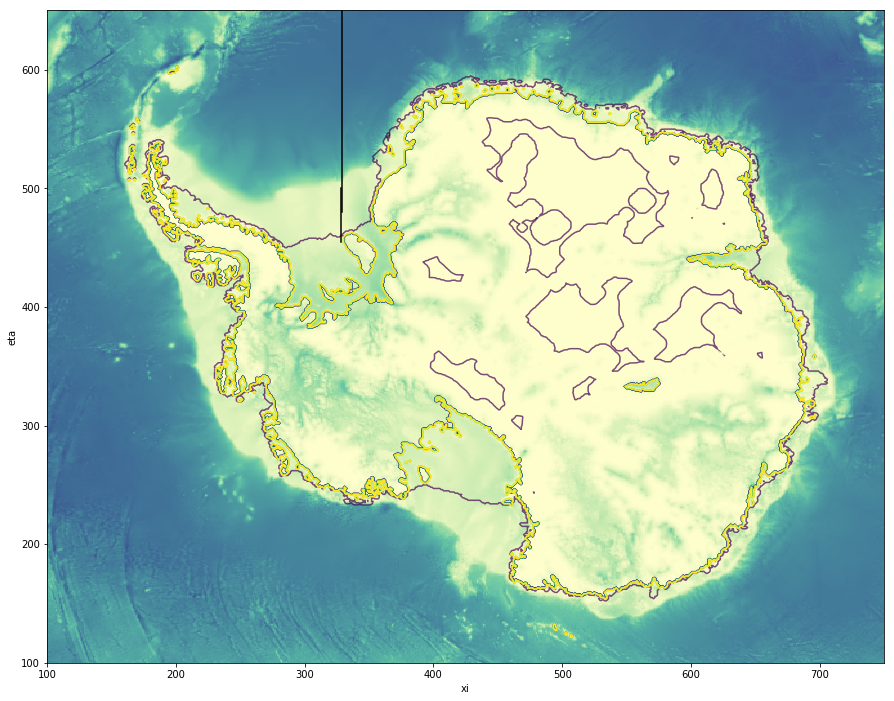

In [102]:
### defining the transsects and plotting them on top of bathy and ice front
plt.close()
fig = plt.figure(figsize=(15,12))
plt.pcolormesh(low.h,cmap=ocm.deep)
plt.contour(low.zice,[-0.01],alpha=0.7)
plt.contour(low.mask_rho)
plt.xlabel('xi')
plt.ylabel('eta')
#linescodeline = [xi_min,eta_min,xi_max,eta_max]
#amery=[650,449,850,449,"amery"]
#ross=[450,0,450,240,"ross"]
weddell=[329,480,329,650,"weddel"]
FRIS=[328,455,328,500,"weddel"]
#bellinghausen=[0,433,225,433,"bellinghausen"]

for line in [weddell,FRIS]:
    plt.plot((line[0],line[2]),(line[1],line[3]),"k-")

plt.xlim((100,750))
plt.ylim((100,650))
plt.show()

In [106]:
def compare_trans(trans,tmin,tmax,smin,smax,mean,max_depth):
    print("Low Nudging")
    plot_cavity(low,trans,max_depth,tmin,tmax,smin,smax,mean)
    print("Mid Nudging")
    plot_cavity(mid,trans,max_depth,tmin,tmax,smin,smax,mean)
    print("High Nudging")
    plot_cavity(high,trans,max_depth,tmin,tmax,smin,smax,mean)

Low Nudging
define slice
calculate mean
plot


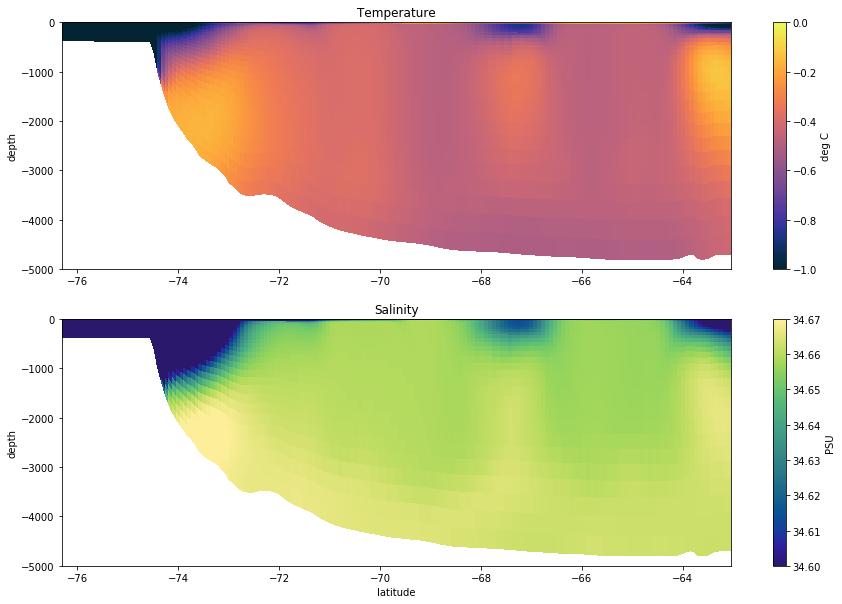

Mid Nudging
define slice
calculate mean
plot


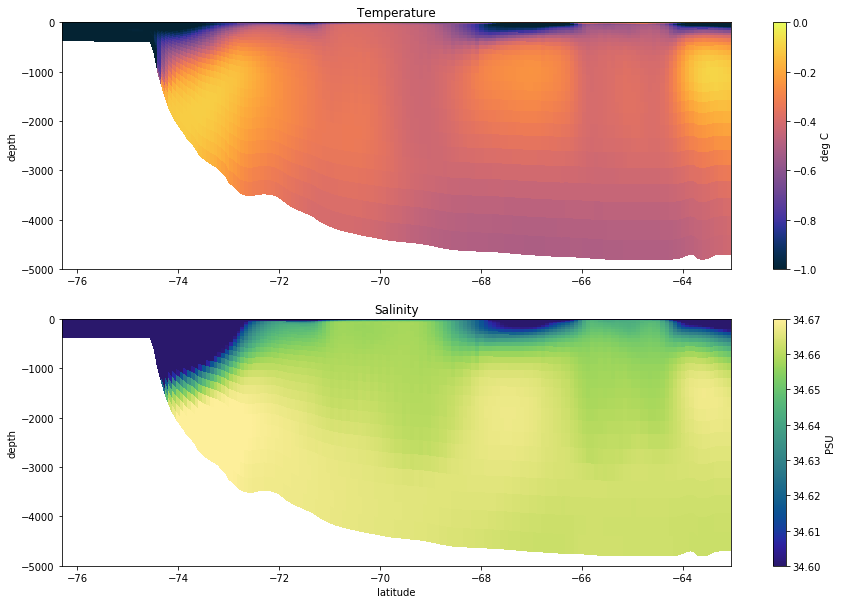

High Nudging
define slice
calculate mean
plot


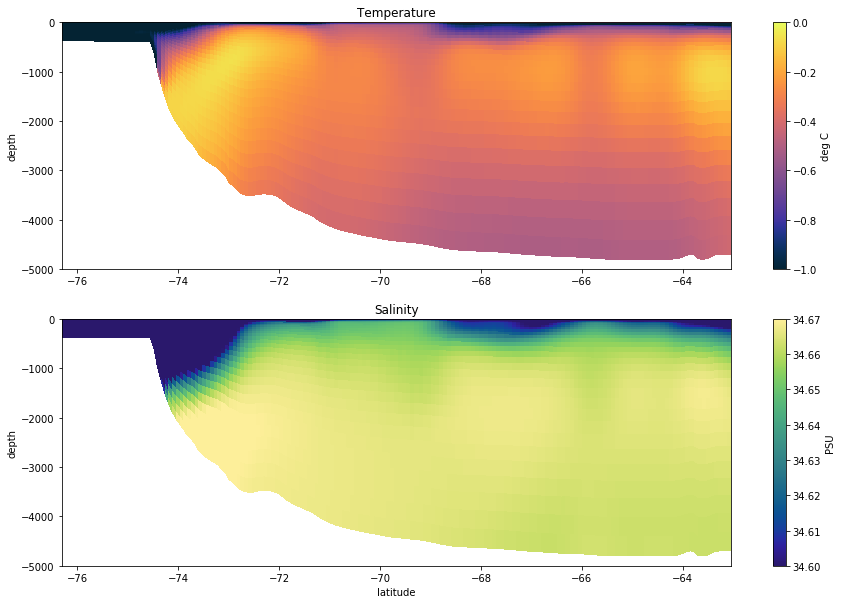

In [109]:
compare_trans(weddell,-1.0,0.0, 34.6,34.670,True,5000)

Low Nudging
define slice
calculate mean
plot


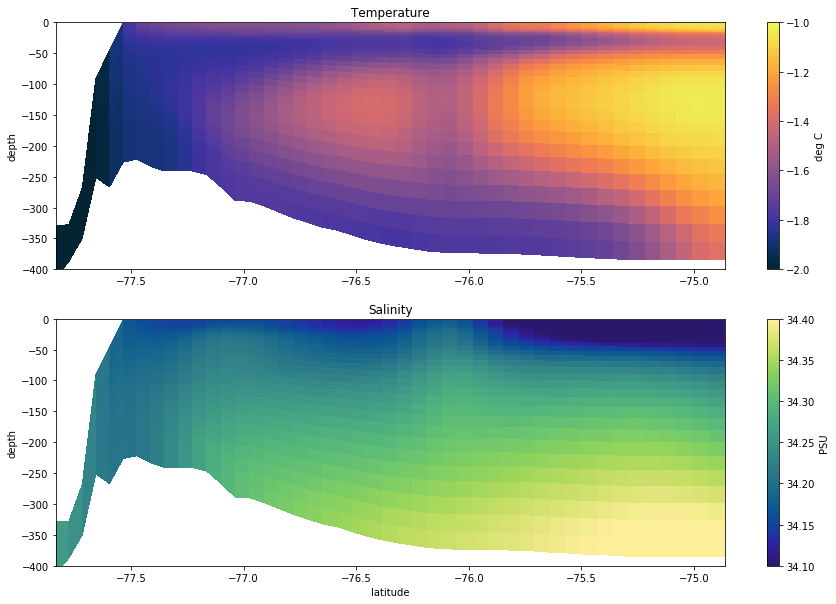

Mid Nudging
define slice
calculate mean
plot


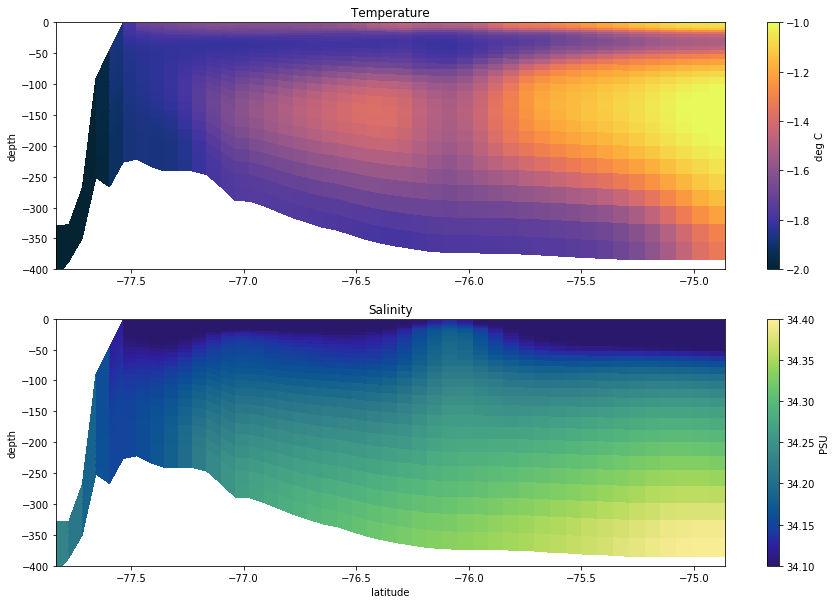

High Nudging
define slice
calculate mean
plot


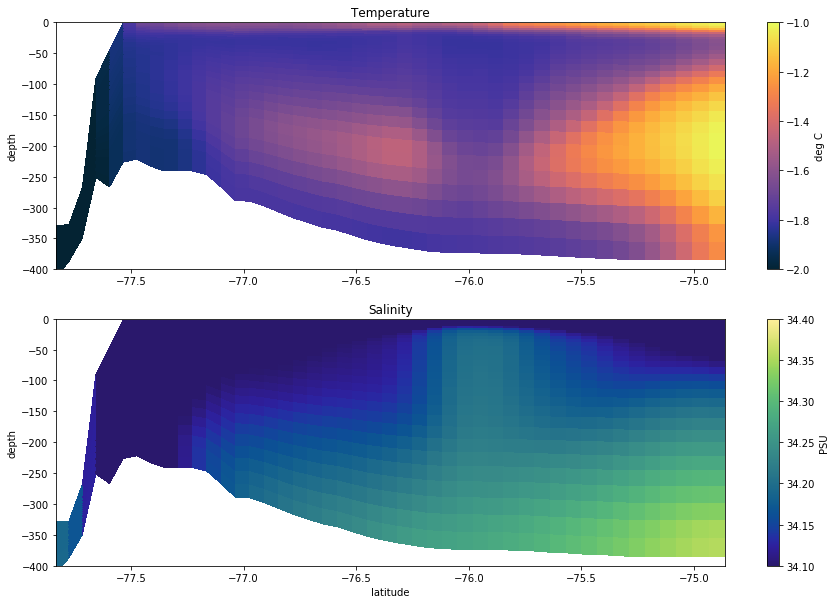

In [115]:
compare_trans(FRIS,-2.0,-1.0, 34.1,34.4,True,400)

In [116]:
compare_trans(FRIS,-2.0,-1.0, 34.1,34.4,False,400)

Low Nudging
define slice
set up widget


interactive(children=(IntSlider(value=5, description='month', max=11), Output()), _dom_classes=('widget-interact',))

Mid Nudging
define slice
set up widget


interactive(children=(IntSlider(value=5, description='month', max=11), Output()), _dom_classes=('widget-interact',))

High Nudging
define slice
set up widget


interactive(children=(IntSlider(value=5, description='month', max=11), Output()), _dom_classes=('widget-interact',))